In [10]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [11]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [12]:
#Sklearn methods
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

Business understanding

Diabetes is a chronic diseas that affects almost 1/3 of general population in the world. As part of the statistics, sometimes is considered that by every three person 2 of them can have diabetes without evenn knowing.

There are two types of Dibetes conditions. Type 1 Diabetes normally is diagnosticated to young people (People under 30 years) an is caused due to a low or even no production of insuline in their bodys, avoiding to have a good sugar regulation. On the other hand, there is the type 2 Diabetes, normally diagnostic to old people or with speciall physical conditions like overweight, this diabetes is generated due to an increase of sugar levels due to an insulin resistance.

Objective:

Understand the relationship between various features according to surveys from the dataset.

**Data**

Current data was obtained from the UC Machine Learning Repository (https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) these are surveys of 21 questions (features) to 253680 people related to their habits. This data as target variable has diabetes (1) or not (0).


1. ID: Patient ID
2. Diabetes_binary: Has diabetes (0 = no diabetes 1 = prediabetes or diabetes)
3. HighBP: HIgh Blood presssure, (0 = no high BP 1 = high BP)
4. HighChol: High cholesterol, (0 = no high cholesterol 1 = high cholesterol)
5. CholCheck: Has had a Cholesterol check in last 5 years?	(0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years)
6. BMI: Body Mass Index
7. Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0 = no 1 = yes)
8. Stroke: (Ever told) you had a stroke. (0 = no 1 = yes)
9. HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) (0 = no 1 = yes)
10. PhysActivity: physical activity in past 30 days - not including job (0 = no 1 = yes)
11. Fruits: Consume Fruit 1 or more times per day (0 = no 1 = yes)
12. Veggies: Consume Vegetables 1 or more times per day (0 = no 1 = yes)
13. HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0 = no 1 = yes)
14. AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. (0 = no 1 = yes)
15. NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0 = no 1 = yes)
16. GenHlth: Would you say that in general your health is: scale 1-5 (1 = excellent 2 = very good 3 = good 4 = fair 5 = poor)
17. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
18. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
19. DiffWalk: Do you have serious difficulty walking or climbing stairs? (0 = no 1 = yes)
20. Sex: Sex	(0 = female 1 = male)
21. Age: Age	13-level age category (_AGEG5YR see codebook) (1 = 18-24 9 = 60-64 13 = 80 or older)
22. Education: Education Level	Education level (EDUCA see codebook) scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate))
23. Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [13]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
dataFrame = cdc_diabetes_health_indicators.data.features
dataFrame["target"] = cdc_diabetes_health_indicators.data.targets
dataFrame.head()

C:\Users\juanr\AppData\Local\Temp\ipykernel_24136\2272850972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["target"] = cdc_diabetes_health_indicators.data.targets


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


As a first step we evaluate the data.

In [14]:
#Extracts information about the data, know the number of rows and predictors and also number of null values.
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [15]:
#Validates number of null values by predictor
dataFrame.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64

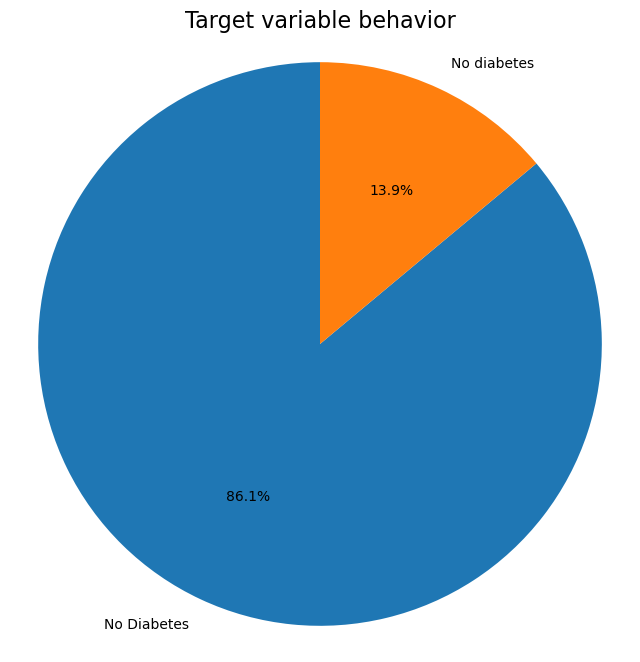

In [16]:
# Visualize the distribution of the target variable
labels = ['No Diabetes', 'No diabetes' ];
fig1, ax1 = plt.subplots(figsize=(8, 8))
target_counts = dataFrame["target"].value_counts() 
ax1.pie(target_counts,  labels=labels,      # Set the labels for each slice
            shadow=False,
            autopct='%1.1f%%',# Add a shadow for a 3D effect
            startangle=90)        # Start the first slice (Apples) at 90 degrees (top)
ax1.axis('equal')
plt.title("Target variable behavior", fontsize=16)
plt.show()

As a first step to analyze the relationship between predictors it is necessary to evaluate the correlation between them:

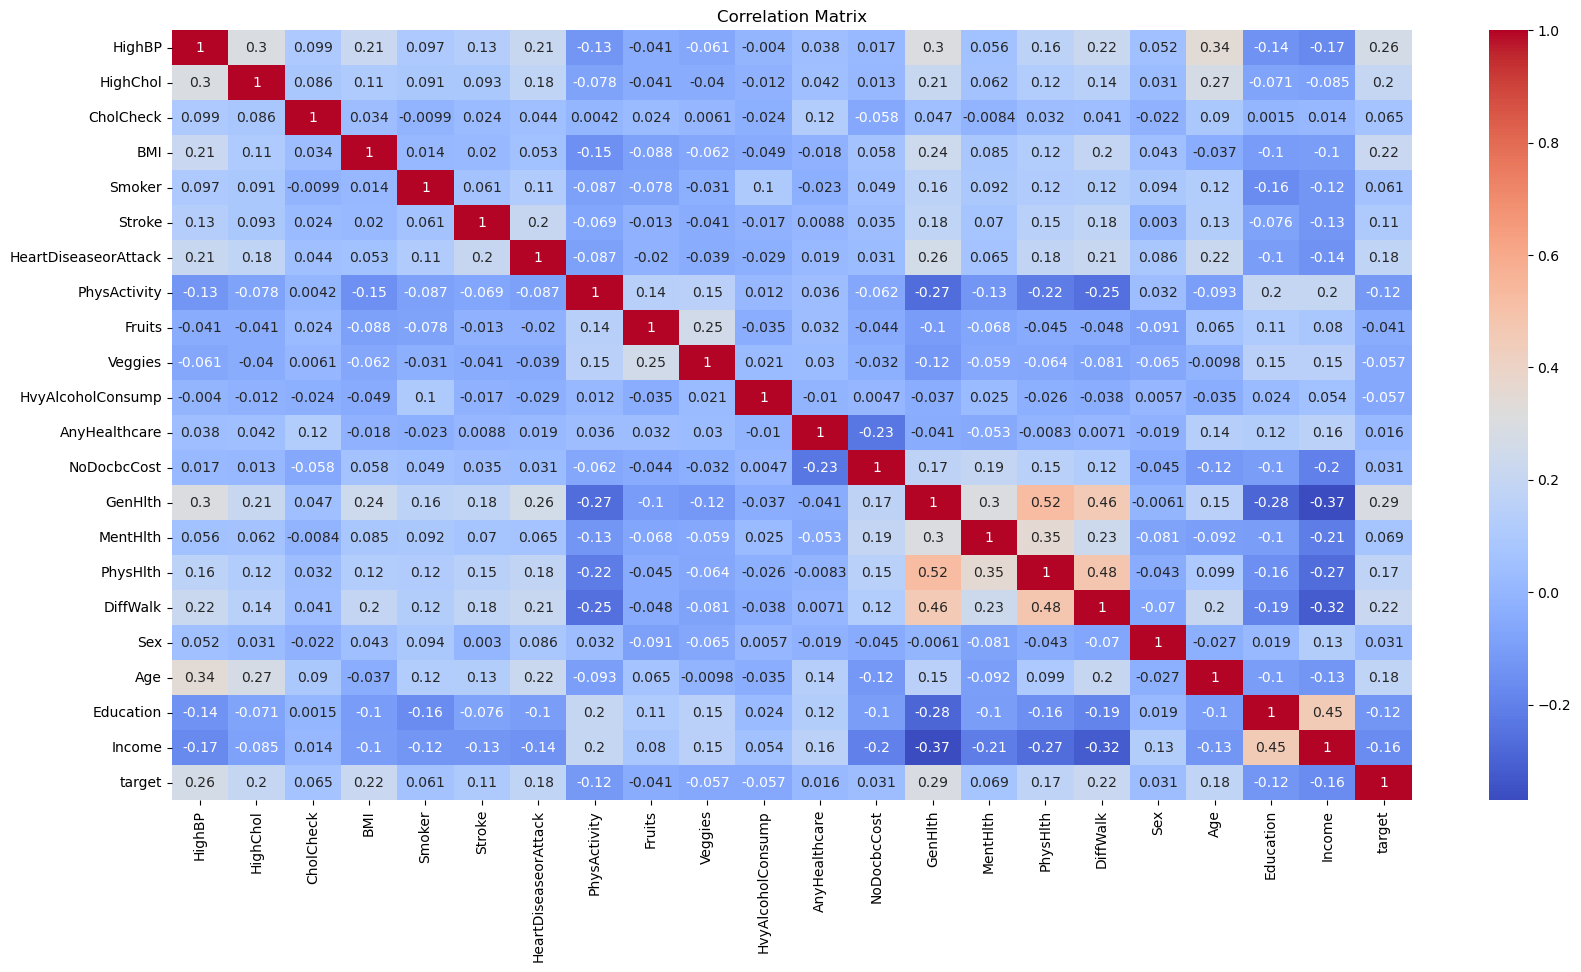

In [17]:
# Visualize correlations
plt.figure(figsize=(20, 10))
sns.heatmap(dataFrame.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As part of the current analysis some of the predictors are in different scales, this can affect the behavior of the model. To avoid an unexpected behavior it's necessary to normalize the data of some of the predictors as:
- Age
- BMI
- General Health
- Mental Health
- Physical Health
- Education
- Income

In [34]:
# A min max normalization method is defined to processs the data
def min_max_normalization(input_array):
    max_value = np.max(input_array);
    min_value = np.min(input_array);
    normalized_result = np.zeros(len(input_array));
    for i, element in enumerate(input_array):
        normalized_result[i] = round((element - min_value)/(max_value-min_value),3);

    return normalized_result;

In [35]:
dataFrame['Age'] = min_max_normalization(dataFrame['Age']);
dataFrame['BMI'] = min_max_normalization(dataFrame['BMI']);
dataFrame['GenHlth'] = min_max_normalization(dataFrame['GenHlth']);
dataFrame['MentHlth'] = min_max_normalization(dataFrame['MentHlth']);
dataFrame['PhysHlth'] = min_max_normalization(dataFrame['PhysHlth']);
dataFrame['Education'] = min_max_normalization(dataFrame['Education']);
dataFrame['Income'] = min_max_normalization(dataFrame['Income']);

C:\Users\juanr\AppData\Local\Temp\ipykernel_24136\2559398691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Age'] = min_max_normalization(dataFrame['Age']);
C:\Users\juanr\AppData\Local\Temp\ipykernel_24136\2559398691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['BMI'] = min_max_normalization(dataFrame['BMI']);
C:\Users\juanr\AppData\Local\Temp\ipykernel_24136\2559398691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

**Visualization between features and Target variable**

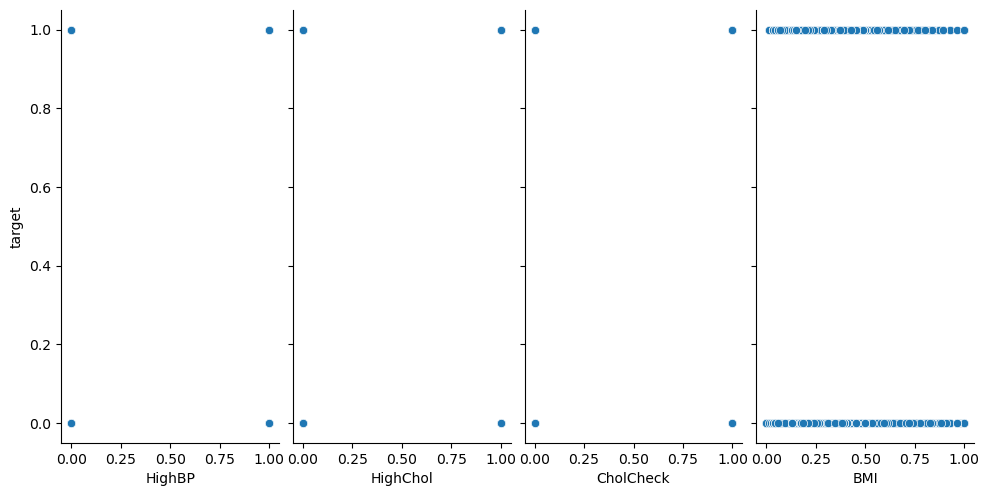

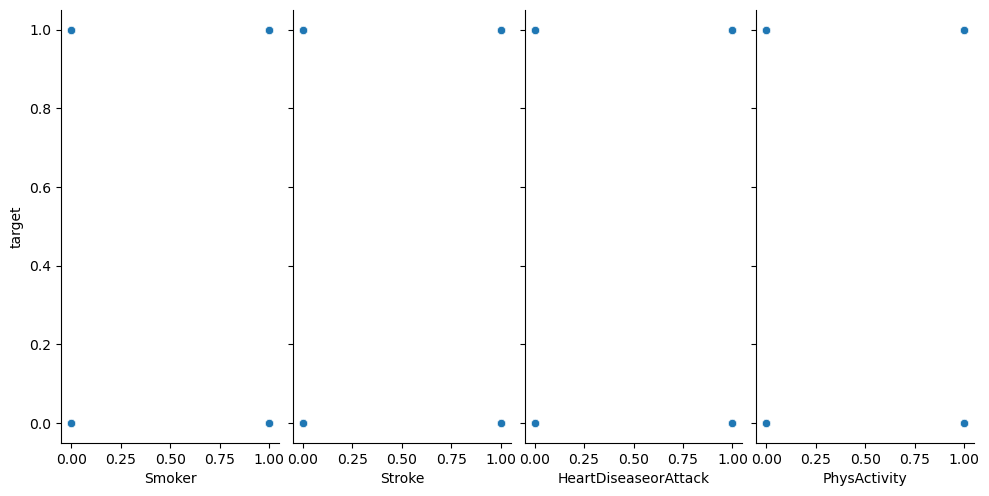

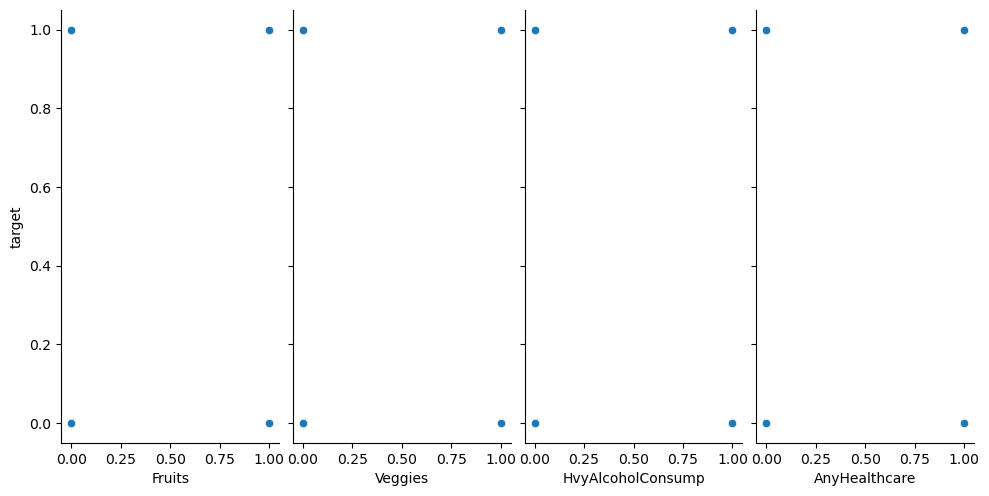

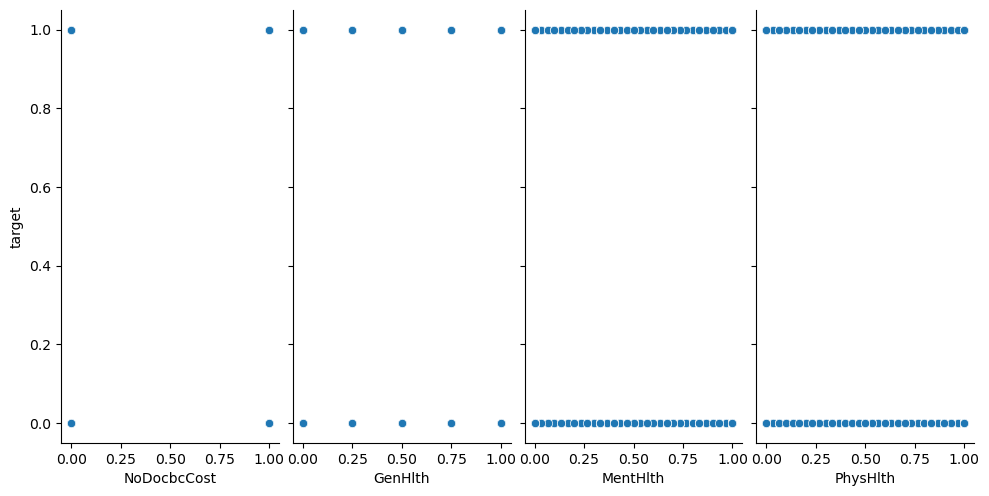

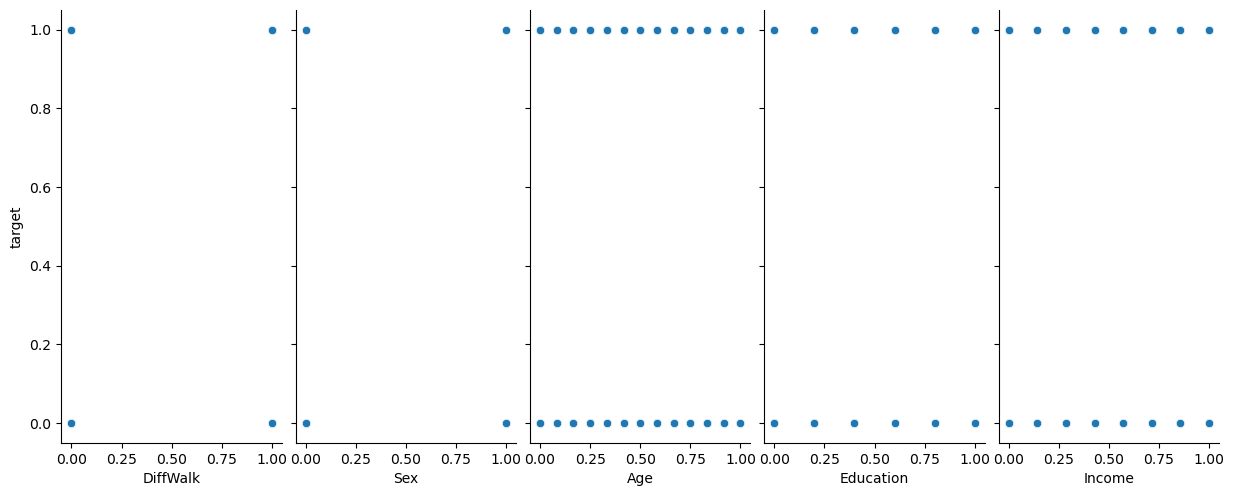

In [37]:
sns.pairplot(dataFrame, x_vars=['HighBP', 'HighChol', 'CholCheck', 'BMI'], y_vars='target', height=5, aspect=0.5)
plt.show()

sns.pairplot(dataFrame, x_vars=['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity'], y_vars='target', height=5, aspect=0.5)
plt.show()

sns.pairplot(dataFrame, x_vars=['Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare'], y_vars='target', height=5, aspect=0.5)
plt.show()

sns.pairplot(dataFrame, x_vars=['NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth'], y_vars='target', height=5, aspect=0.5)
plt.show()

sns.pairplot(dataFrame, x_vars=['DiffWalk', 'Sex', 'Age', 'Education', 'Income'], y_vars='target', height=5, aspect=0.5)
plt.show()

After this analysis there is no much information that is possible to extract from the relationship between the target variable and the spcecific feature. This behavior is due to the condition that these are boolean values, so it's not possible to identify gray areas where there can be some information about the behavior.